In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [3]:
def show_curve(F_statistic, critical_value, df_between, df_within):
    x = np.linspace(0, 12, 1000)  # Range for F-distribution
    y = stats.f.pdf(x, df_between, df_within)  # PDF of F-distribution
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='F-distribution', color='blue')

    # Shade the critical region
    plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Critical Region')
    
    # Draw the F-statistic line
    plt.axvline(F_statistic, color='orange', linestyle='--', label='F-statistic')
    
    plt.title('ANOVA: F-Distribution and Critical Region')
    plt.xlabel('F Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.xlim(0, 12)  # Adjust x-axis limits
    plt.ylim(0, max(y) * 1.1)  # Adjust y-axis limits for better visibility
    plt.show()

F-statistic: 10.67
Critical F-value: 3.89


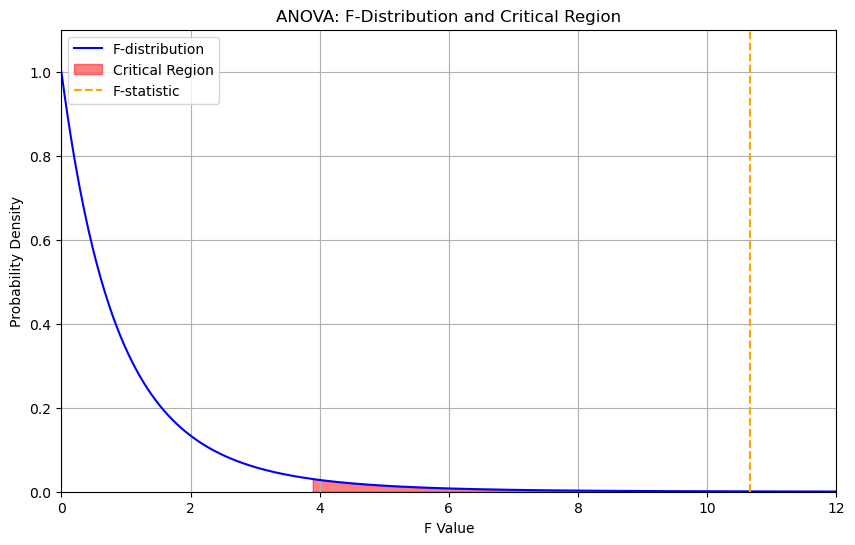

Reject the null hypothesis (There is a significant difference between group means).


In [4]:
# Step 1: Load the dataset
file_path = 'sample_data.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)
df = df.dropna()
# Assume 'School' is the categorical column and 'Values' is the numerical column.
# Step 2: Group the data by 'School' and calculate means
groups = df.groupby('School')['Values']
group_means = groups.mean()
overall_mean = df['Values'].mean()

# Step 3: Calculate SSB (Sum of Squares Between)
SSB = sum(groups.size()[group] * (group_mean - overall_mean) ** 2 
           for group, group_mean in group_means.items())

# Step 4: Calculate SSW (Sum of Squares Within)
SSW = sum(((group_data - group_means[group_name]) ** 2).sum() 
           for group_name, group_data in groups)

# Step 5: Degrees of freedom
df_between = len(group_means) - 1  # k - 1
df_within = len(df) - len(group_means)  # N - k

# Step 6: Calculate MSB and MSW
MSB = SSB / df_between
MSW = SSW / df_within

# Step 7: Calculate the F-statistic
F_statistic = MSB / MSW

# Step 8: Determine the critical F-value from the F-distribution table
alpha = 0.05  # Significance level
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Step 9: Print results
print(f"F-statistic: {F_statistic:.2f}")
print(f"Critical F-value: {critical_value:.2f}")

show_curve(F_statistic, critical_value, df_between, df_within)
# Step 10: Decision - Reject or Fail to Reject Null Hypothesis
if F_statistic > critical_value:
    print("Reject the null hypothesis (There is a significant difference between group means).")
else:
    print("Fail to reject the null hypothesis (No significant difference between group means).")